Column Names: Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


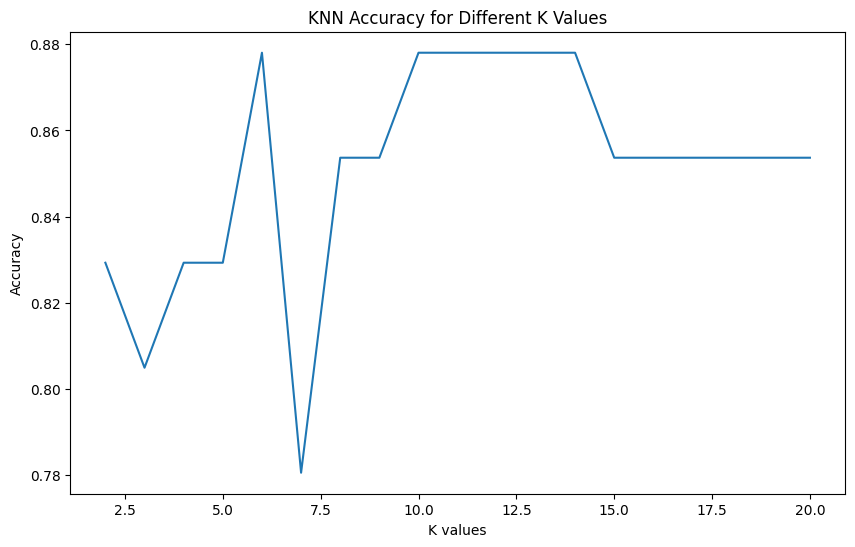


KNN:
Accuracy: 0.8292682926829268
Precision: 0.25
Recall: 0.2
F1-score: 0.2222222222222222
Confusion Matrix:
[[33  3]
 [ 4  1]]


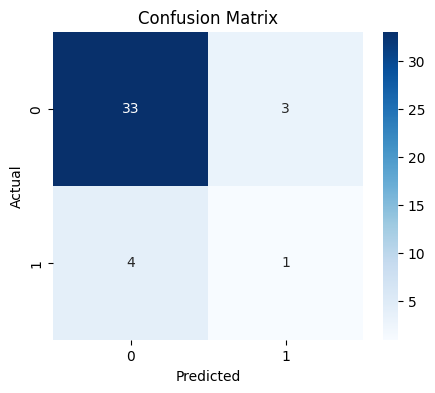


Decision Tree:
Accuracy: 0.7560975609756098
Precision: 0.2222222222222222
Recall: 0.4
F1-score: 0.2857142857142857
Confusion Matrix:
[[29  7]
 [ 3  2]]


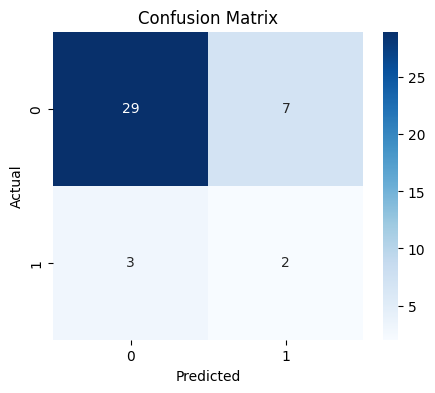


SVM:
Accuracy: 0.8780487804878049
Precision: 0.0
Recall: 0.0
F1-score: 0.0
Confusion Matrix:
[[36  0]
 [ 5  0]]


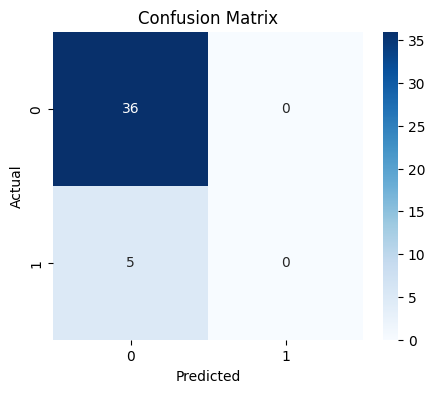


Naive Bayes:
Accuracy: 0.7073170731707317
Precision: 0.26666666666666666
Recall: 0.8
F1-score: 0.4
Confusion Matrix:
[[25 11]
 [ 1  4]]


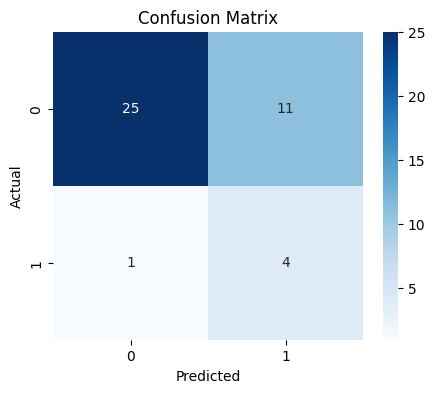


Linear Regression:
Accuracy: 0.9024390243902439
Precision: 0.6666666666666666
Recall: 0.4
F1-score: 0.5
Confusion Matrix:
[[35  1]
 [ 3  2]]


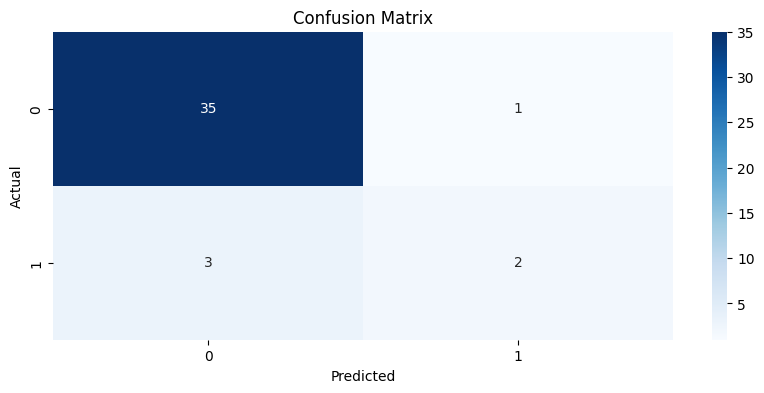

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Read the data with pandas and find features and target variables
data = pd.read_csv('/content/full_filled_stroke_data .csv')

# Print column names to identify categorical columns
print("Column Names:", data.columns)

# Correct column names in categorical_cols based on actual column names in the dataset
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Handle categorical variables using one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_cols)

# Separate features and target variable
features = data_encoded.drop('stroke', axis=1)
target = data_encoded['stroke']

# Normalize the data with min-max scaling
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Train KNN
knn_scores = []
k_values = range(2, 21)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    knn_scores.append(acc)

# Plot accuracy for different K values [2-20]
plt.figure(figsize=(10, 6))
plt.plot(k_values, knn_scores)
plt.xlabel('K values')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different K Values')
plt.show()
# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)  # You can set the number of neighbors as desired
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
prec_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print("\nKNN:")
print("Accuracy:", acc_knn)
print("Precision:", prec_knn)
print("Recall:", recall_knn)
print("F1-score:", f1_knn)
conf_matrix = confusion_matrix(y_test,y_pred_knn)
print("Confusion Matrix:")
print(conf_matrix)
# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Train Decision Tree and find performance metrics
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
print("\nDecision Tree:")
print("Accuracy:", acc_dt)
print("Precision:", prec_dt)
print("Recall:", recall_dt)
print("F1-score:", f1_dt)
conf_matrix = confusion_matrix(y_test,y_pred_dt)
print("Confusion Matrix:")
print(conf_matrix)
# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Train SVM and find performance metrics
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm,zero_division=0)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
print("\nSVM:")
print("Accuracy:", acc_svm)
print("Precision:", prec_svm)
print("Recall:", recall_svm)
print("F1-score:", f1_svm)
conf_matrix = confusion_matrix(y_test,y_pred_svm)
print("Confusion Matrix:")
print(conf_matrix)
# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Train Naive Bayes and find performance metrics
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)
prec_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
print("\nNaive Bayes:")
print("Accuracy:", acc_nb)
print("Precision:", prec_nb)
print("Recall:", recall_nb)
print("F1-score:", f1_nb)
conf_matrix = confusion_matrix(y_test,y_pred_nb)
print("Confusion Matrix:")
print(conf_matrix)
# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
# Train Logistic Regression and find performance metrics
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr,zero_division=0)  # Set zero_division=0
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
print("\nLinear Regression:")
print("Accuracy:", acc_lr)
print("Precision:", prec_lr)
print("Recall:", recall_lr)
print("F1-score:", f1_lr)
conf_matrix = confusion_matrix(y_test,y_pred_lr)
print("Confusion Matrix:")
print(conf_matrix)
# Plot Confusion Matrix
plt.figure(figsize=(10, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


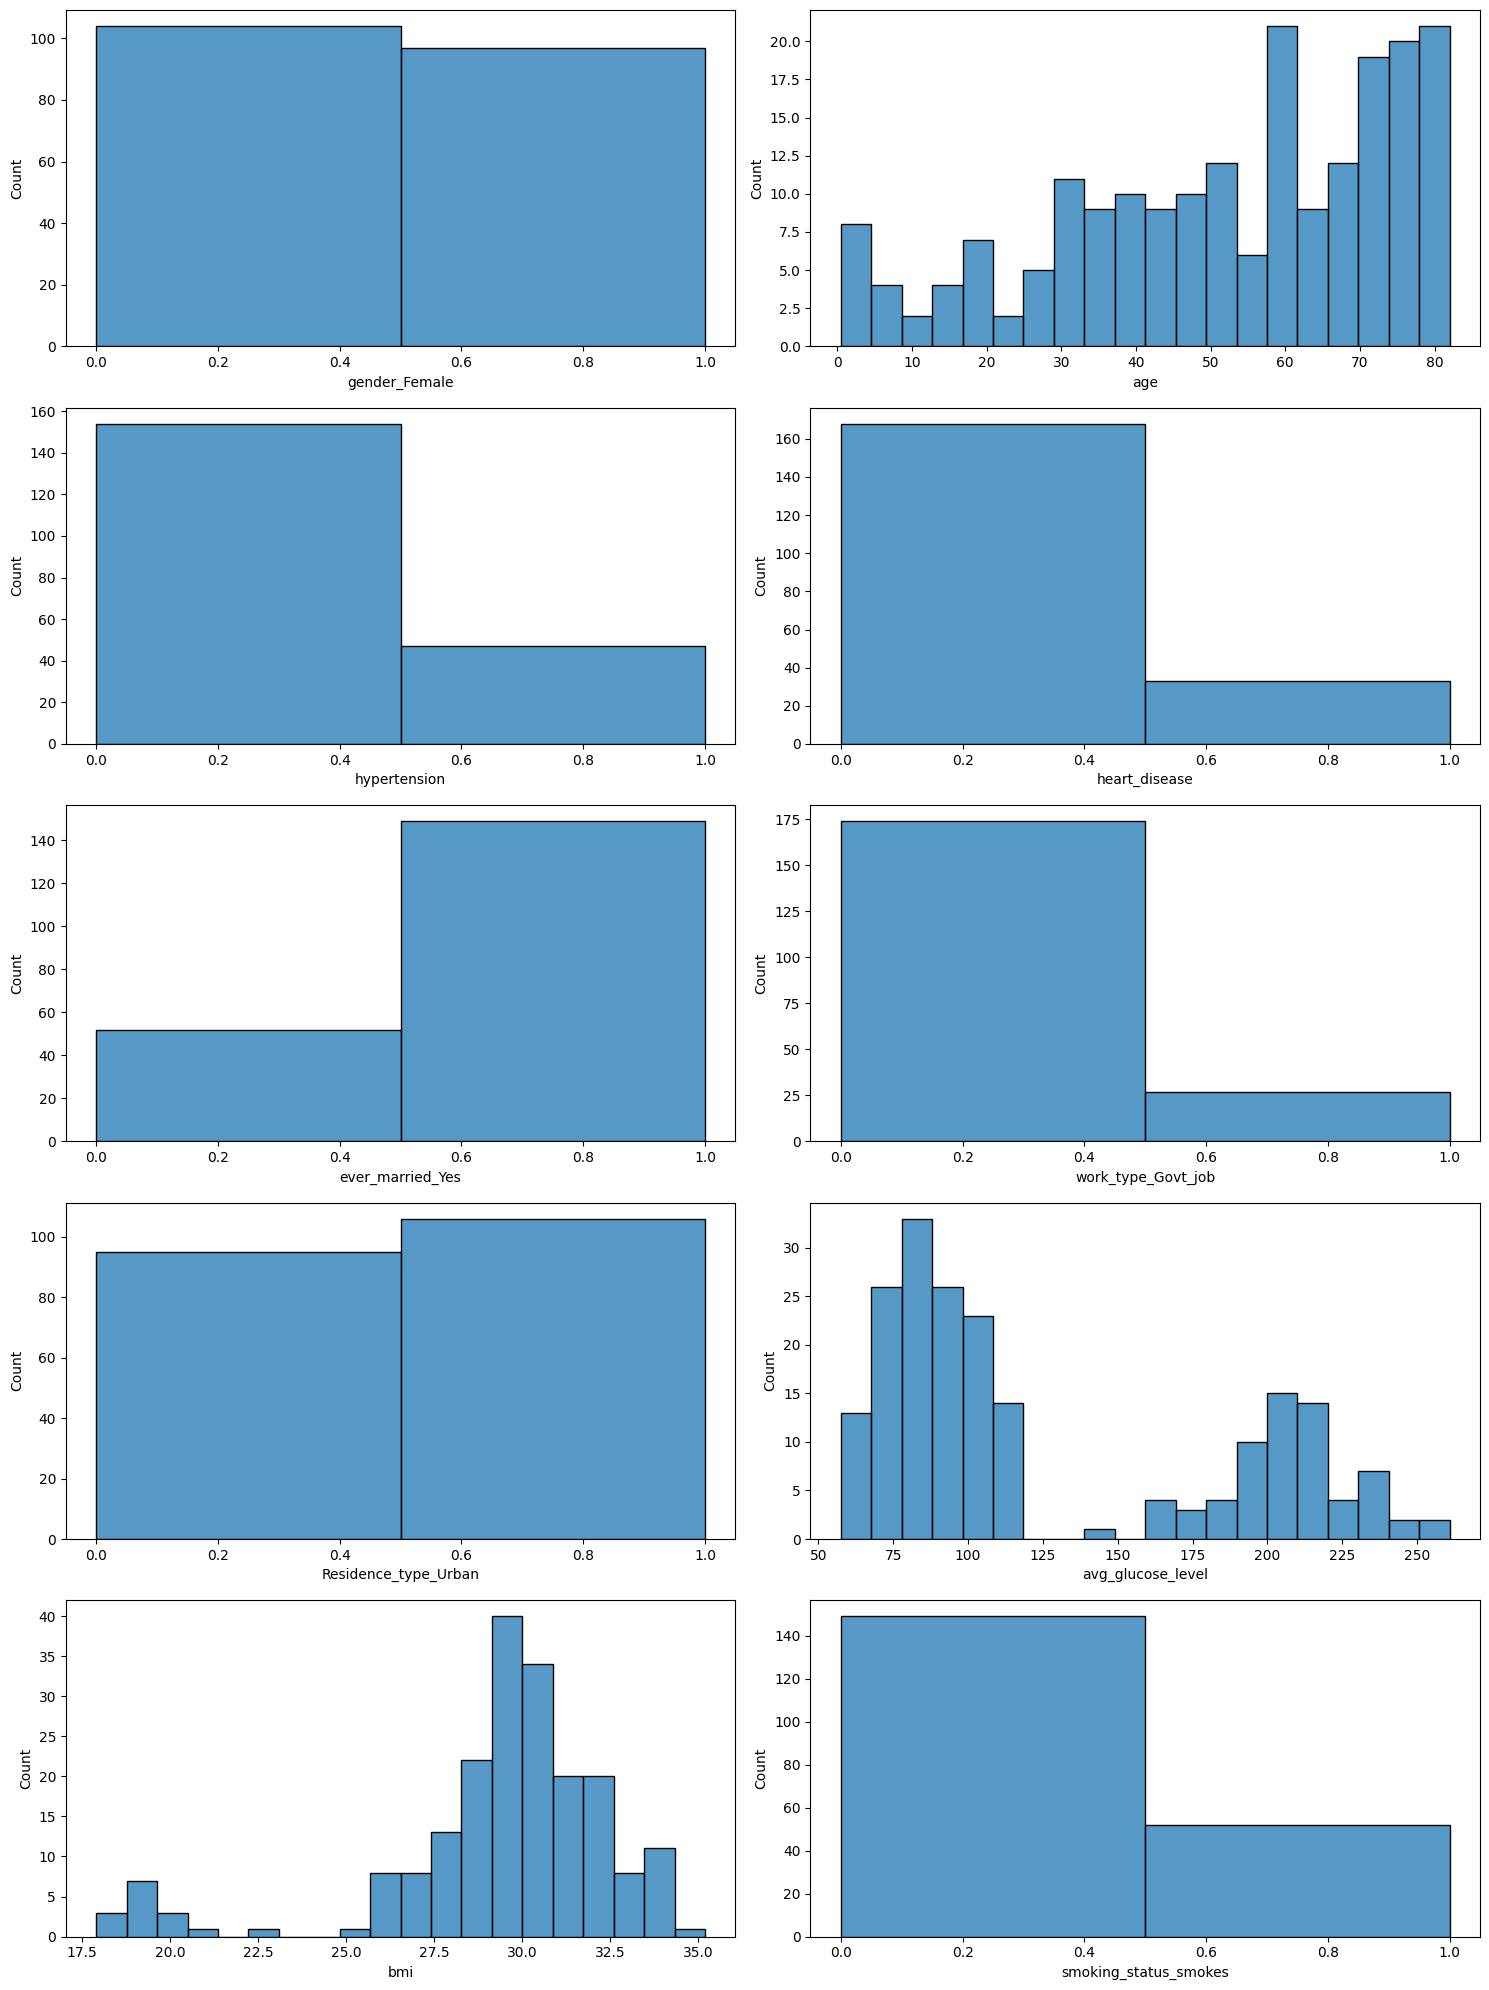

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define work_type_map, residence_type_map, and smoking_status_map
# (You'll need to replace these with your actual mapping if needed)
work_type_map = data_encoded['work_type_Govt_job'].unique() # Get unique values from the encoded column
residence_type_map = data_encoded['Residence_type_Urban'].unique()  # Get unique values from the encoded column
smoking_status_map = data_encoded['smoking_status_smokes'].unique()  # Get unique values from the encoded column

fig, ax = plt.subplots(5, 2, figsize=(15, 20))

# Use data_encoded instead of data for plotting
sns.histplot(data=data_encoded, x='gender_Female', bins=2, ax=ax[0, 0]) # Assuming gender was one-hot encoded to 'gender_Female' and 'gender_Male'
sns.histplot(data=data_encoded, x='age', bins=20, ax=ax[0, 1])
sns.histplot(data=data_encoded, x='hypertension', bins=2, ax=ax[1, 0]) # Assuming 'hypertension' is the correct column name
sns.histplot(data=data_encoded, x='heart_disease', bins=2, ax=ax[1, 1]) # Assuming 'heart_disease' is the correct column name
sns.histplot(data=data_encoded, x='ever_married_Yes', bins=2, ax=ax[2, 0]) # Assuming ever_married was one-hot encoded to 'ever_married_Yes' and 'ever_married_No'
sns.histplot(data=data_encoded, x='work_type_Govt_job', bins=len(work_type_map), ax=ax[2, 1]) # Assuming 'work_type_Govt_job' is one of the one-hot encoded columns for work_type
sns.histplot(data=data_encoded, x='Residence_type_Urban', bins=len(residence_type_map), ax=ax[3, 0])# Assuming 'Residence_type_Urban' is one of the one-hot encoded columns for Residence_type
sns.histplot(data=data_encoded, x='avg_glucose_level', bins=20, ax=ax[3, 1])
sns.histplot(data=data_encoded, x='bmi', bins=20, ax=ax[4, 0])
sns.histplot(data=data_encoded, x='smoking_status_smokes', bins=len(smoking_status_map), ax=ax[4, 1])# Assuming 'smoking_status_smokes' is one of the one-hot encoded columns for smoking_status


plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load dataset
df = pd.read_csv("/content/full_filled_stroke_data .csv")

# Encode categorical features
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Split features and target
X = df.drop('stroke', axis=1)
y = df['stroke']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Custom learning rates and batch sizes for each epoch count
epoch_settings = {
    4:   {"lr": 0.01,   "batch_size": 8},
    8:   {"lr": 0.005,  "batch_size": 16},
    10:  {"lr": 0.005,  "batch_size": 32},
    12:  {"lr": 0.001,  "batch_size": 32},
    16:  {"lr": 0.001,  "batch_size": 64},
    19:  {"lr": 0.0005, "batch_size": 64},
}

results = []

for epochs, params in epoch_settings.items():
    lr = params["lr"]
    batch_size = params["batch_size"]

    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=lr),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
    _, acc = model.evaluate(X_test, y_test, verbose=0)

    results.append({
        "Epochs": epochs,
        "Learning Rate": lr,
        "Batch Size": batch_size,
        "Accuracy": round(acc, 4)
    })

# Print results
results_df = pd.DataFrame(results)
print("\n📊 Neural Network Accuracy Across Epoch Settings:")
print(results_df.to_string(index=False))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



📊 Neural Network Accuracy Across Epoch Settings:
 Epochs  Learning Rate  Batch Size  Accuracy
      4         0.0100           8    0.7561
      8         0.0050          16    0.7805
     10         0.0050          32    0.7805
     12         0.0010          32    0.7805
     16         0.0010          64    0.8049
     19         0.0005          64    0.8049


<ipython-input-17-91802c69f826>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)


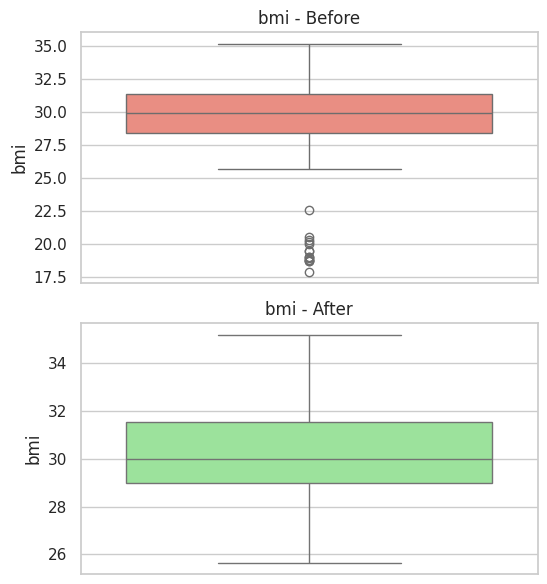

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/full_filled_stroke_data .csv")
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

# Backup original for comparison
df_before = df.copy()

# Function to remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

# Apply IQR filtering
df_cleaned = df.copy()
for col in [ 'bmi']:
    df_cleaned = remove_outliers_iqr(df_cleaned, col)

# Plot boxplots: Before vs After
features = [ 'bmi']
plt.figure(figsize=(15, 6))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df_before[feature], color='salmon')
    plt.title(f'{feature} - Before')

    plt.subplot(2, 3, i+4)
    sns.boxplot(y=df_cleaned[feature], color='lightgreen')
    plt.title(f'{feature} - After')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adagrad, RMSprop

# Load your dataset
df = pd.read_csv('/content/full_filled_stroke_data .csv')

# Fill missing values in 'bmi' if any
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

# Normalize 'bmi' and 'avg_glucose_level'
scaler = MinMaxScaler()
df[['bmi', 'avg_glucose_level']] = scaler.fit_transform(df[['bmi', 'avg_glucose_level']])

# One-hot encode categorical variables
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Prepare features and target
X = df.drop('stroke', axis=1)
y = df['stroke']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print("=== Logistic Regression Report ===")
print(classification_report(y_test, y_pred))

# Function to build ANN
def build_model(optimizer):
    model = Sequential()
    model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train with SGD
print("\n=== ANN with SGD ===")
model_sgd = build_model(SGD(learning_rate=0.01))
model_sgd.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1)

# Train with Adagrad
print("\n=== ANN with Adagrad ===")
model_adagrad = build_model(Adagrad(learning_rate=0.01))
model_adagrad.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1)

# Train with RMSprop
print("\n=== ANN with RMSprop ===")
model_rmsprop = build_model(RMSprop(learning_rate=0.001))
model_rmsprop.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1)


=== Logistic Regression Report ===
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        36
           1       0.50      0.40      0.44         5

    accuracy                           0.88        41
   macro avg       0.71      0.67      0.69        41
weighted avg       0.87      0.88      0.87        41


=== ANN with SGD ===
Epoch 1/50


<ipython-input-12-dd98e2ad1833>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7789 - loss: 1.1057 - val_accuracy: 0.8750 - val_loss: 0.5110
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7500 - loss: 0.6423 - val_accuracy: 0.8750 - val_loss: 0.4928
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7296 - loss: 0.6570 - val_accuracy: 0.8750 - val_loss: 0.4896
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7577 - loss: 0.6380 - val_accuracy: 0.8750 - val_loss: 0.5048
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7095 - loss: 0.6825 - val_accuracy: 0.8750 - val_loss: 0.4872
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7916 - loss: 0.6052 - val_accuracy: 0.8750 - val_loss: 0.4973
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7287 - loss: 0.6416 - val_accuracy: 0.8750 - val_loss: 0.4926
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7798 - loss: 0.6192 - val_accuracy: 0.8750 - val_loss: 0.4970
Epoch 9/50
9/9 ━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5607 - loss: 0.8642 - val_accuracy: 0.8750 - val_loss: 0.5108
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7464 - loss: 0.6684 - val_accuracy: 0.8750 - val_loss: 0.4712
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7881 - loss: 0.5817 - val_accuracy: 0.6250 - val_loss: 0.6388
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7476 - loss: 0.5912 - val_accuracy: 0.8750 - val_loss: 0.5345
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7747 - loss: 0.6180 - val_accuracy: 0.6250 - val_loss: 0.6330
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7778 - loss: 0.5895 - val_accuracy: 0.5000 - val_loss: 0.6702
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7445 - loss: 0.5735 - val_accuracy: 0.8750 - val_loss: 0.5048
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7913 - loss: 0.5430 - val_accuracy: 0.8750 - val_loss: 0.5535
Epoch 9/50
9/9

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.2113 - loss: 15.0588 - val_accuracy: 0.1250 - val_loss: 13.3886
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2372 - loss: 9.9400 - val_accuracy: 0.1250 - val_loss: 9.7286
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2305 - loss: 7.8289 - val_accuracy: 0.1250 - val_loss: 7.4968
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2251 - loss: 5.6109 - val_accuracy: 0.1250 - val_loss: 5.5389
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2445 - loss: 3.8408 - val_accuracy: 0.1250 - val_loss: 3.7970
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2086 - loss: 2.7344 - val_accuracy: 0.1250 - val_loss: 2.2226
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2318 - loss: 1.5207 - val_accuracy: 0.1875 - val_loss: 1.0623
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3696 - loss: 0.8220 - val_accuracy: 0.7500 - val_loss: 0.6289
Epoch 9/50
9

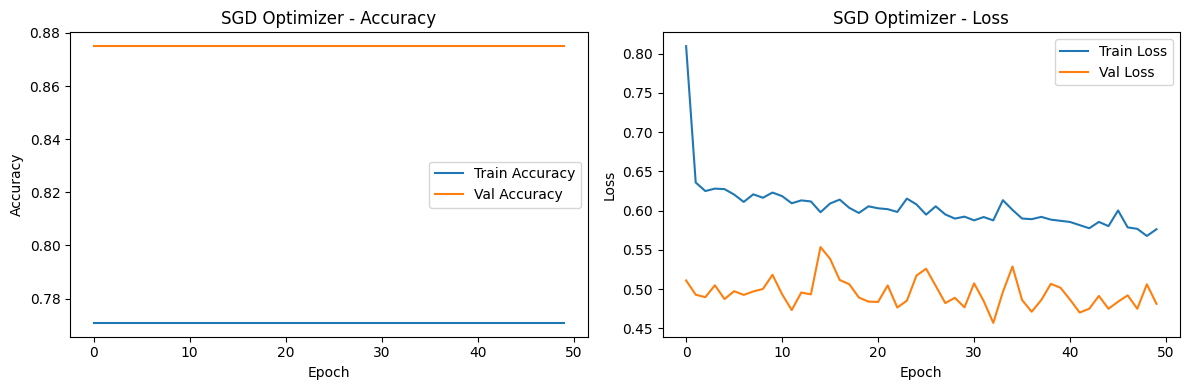

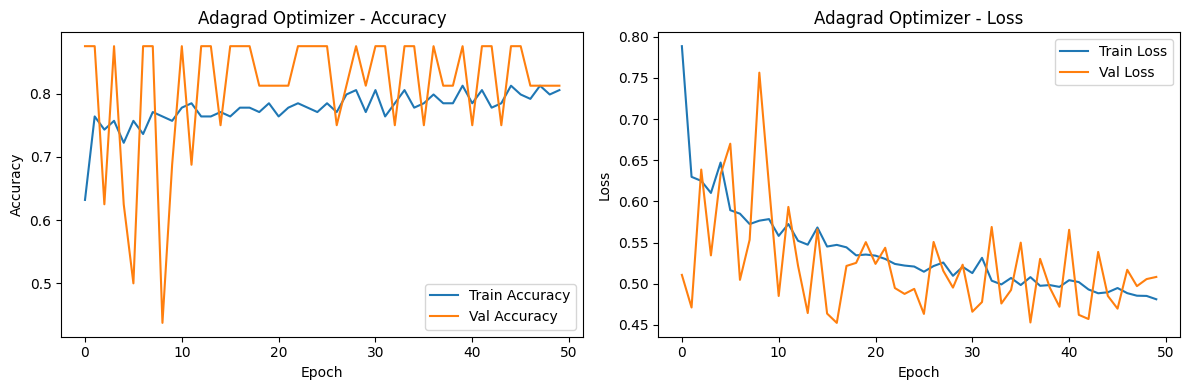

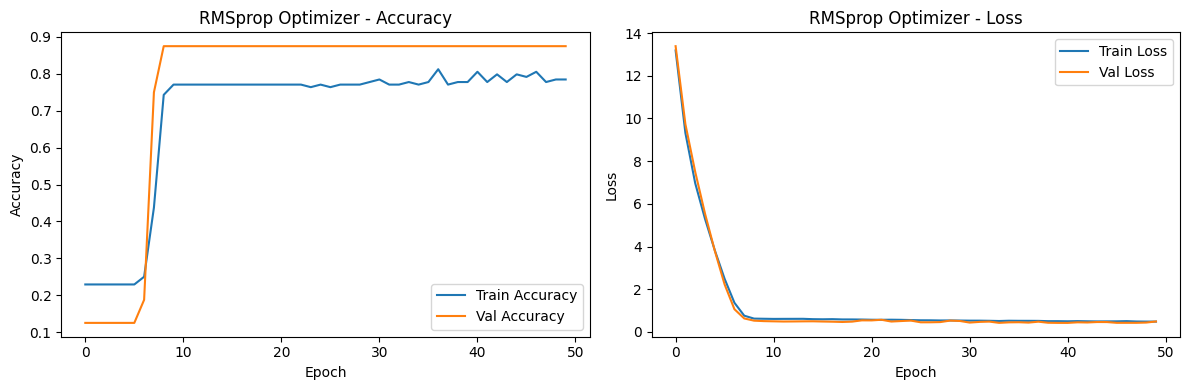

In [ ]:
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()
plot_history(model_sgd.history, "SGD Optimizer")
plot_history(model_adagrad.history, "Adagrad Optimizer")
plot_history(model_rmsprop.history, "RMSprop Optimizer")
